In [1]:
# ==========================================
# 🗺️ Areal Morphometrics:
# A Creative Atlas of Area Charts
# (NumPy, Pandas, Matplotlib)
# ==========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (9, 5)
np.random.seed(2025)

# Synthetic time series
t = pd.date_range("2025-01-01", periods=120, freq="D")
base = np.linspace(0, 6*np.pi, len(t))

def smooth_pos(x):
    s = pd.Series(x).rolling(7, min_periods=1, center=True).mean().values
    return np.clip(s, 0, None)

A = smooth_pos(1.2 + 0.8*np.sin(base)     + 0.3*np.random.randn(len(t)))
B = smooth_pos(1.0 + 0.6*np.sin(base+1.0) + 0.3*np.random.randn(len(t)))
C = smooth_pos(0.8 + 0.7*np.sin(base+2.1) + 0.3*np.random.randn(len(t)))
D = smooth_pos(0.6 + 0.9*np.sin(base+3.3) + 0.3*np.random.randn(len(t)))

df = pd.DataFrame({"A":A, "B":B, "C":C, "D":D}, index=t)


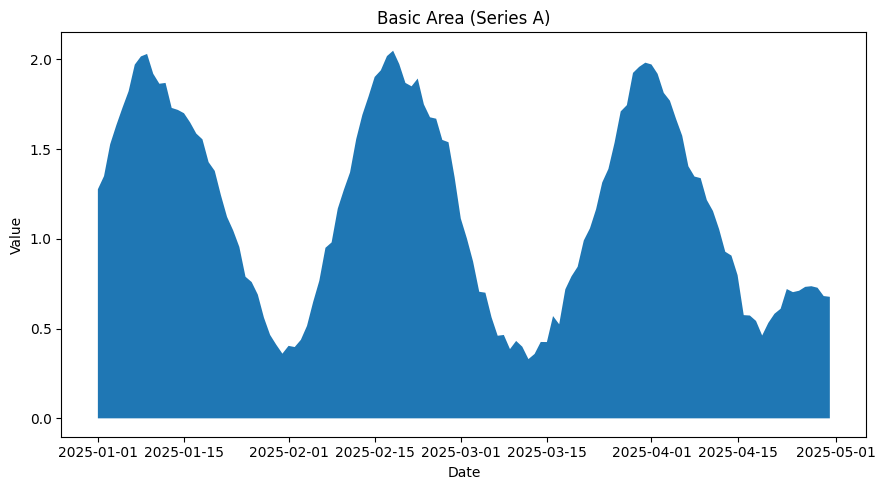

In [2]:
y = df["A"]
plt.figure(); plt.fill_between(df.index, y, 0)
plt.title("Basic Area (Series A)"); plt.xlabel("Date"); plt.ylabel("Value")
plt.tight_layout(); plt.show()


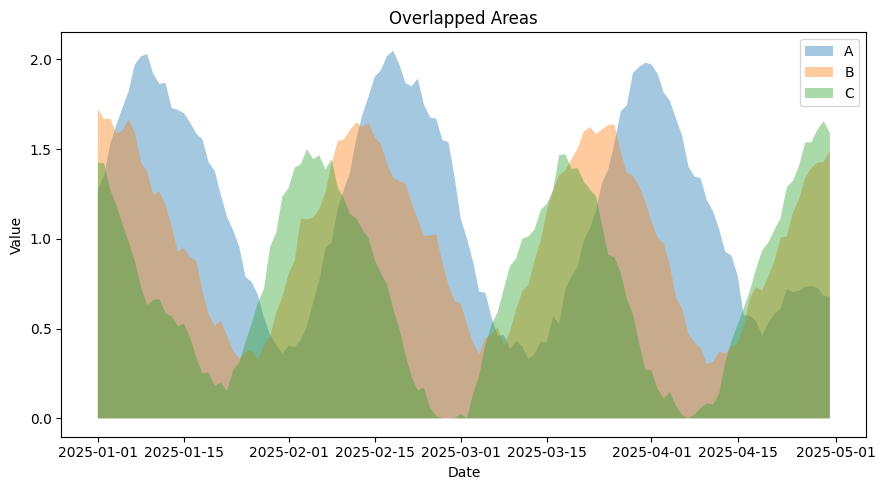

In [3]:
plt.figure()
for col in ["A","B","C"]:
    plt.fill_between(df.index, df[col], 0, alpha=0.4, label=col)
plt.title("Overlapped Areas"); plt.xlabel("Date"); plt.ylabel("Value"); plt.legend()
plt.tight_layout(); plt.show()


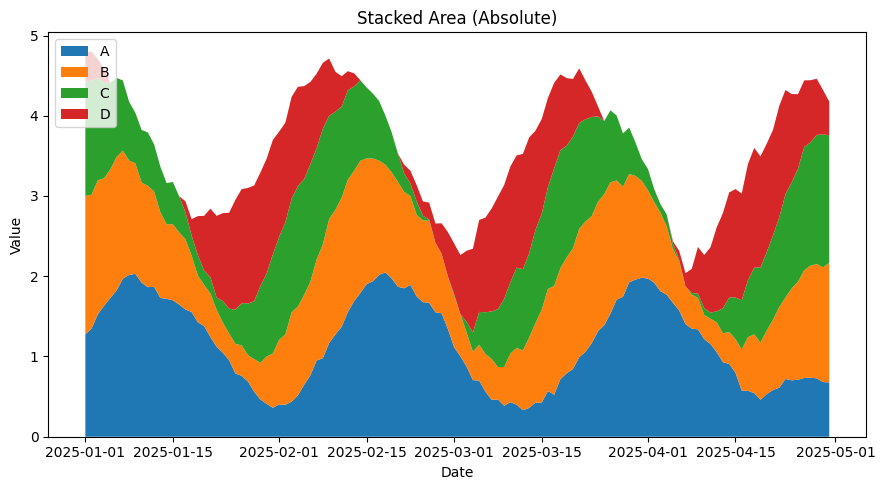

In [4]:
plt.figure()
plt.stackplot(df.index, df["A"], df["B"], df["C"], df["D"], labels=list(df.columns))
plt.title("Stacked Area (Absolute)"); plt.xlabel("Date"); plt.ylabel("Value"); plt.legend(loc="upper left")
plt.tight_layout(); plt.show()


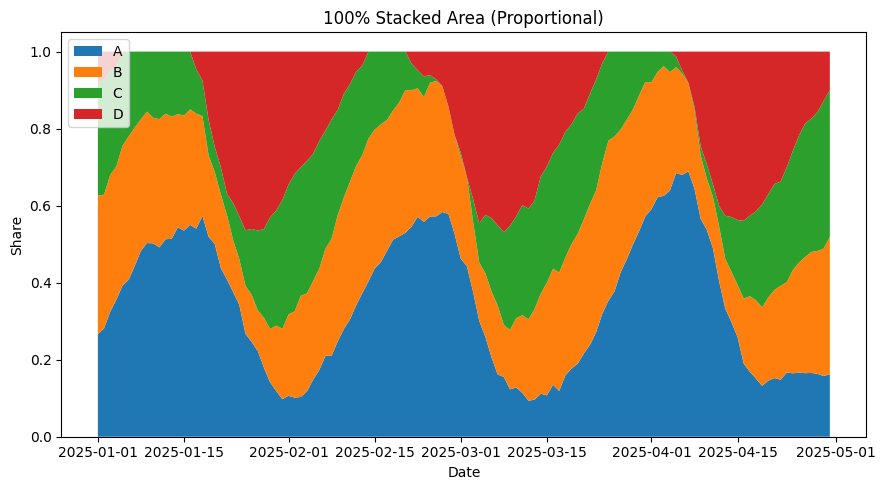

In [5]:
prop = df.div(df.sum(axis=1), axis=0).fillna(0)
plt.figure()
plt.stackplot(prop.index, prop["A"], prop["B"], prop["C"], prop["D"], labels=list(prop.columns))
plt.title("100% Stacked Area (Proportional)"); plt.xlabel("Date"); plt.ylabel("Share"); plt.legend(loc="upper left")
plt.tight_layout(); plt.show()


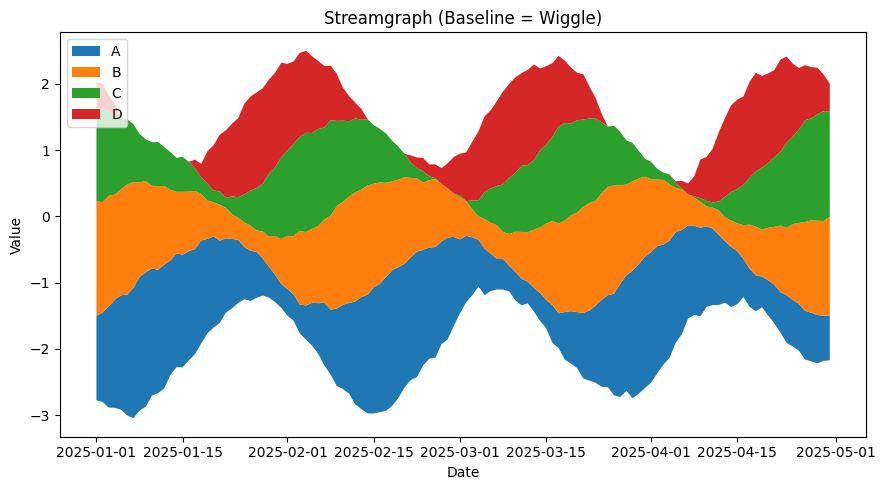

In [6]:
plt.figure()
plt.stackplot(df.index, df["A"], df["B"], df["C"], df["D"], baseline="wiggle", labels=list(df.columns))
plt.title("Streamgraph (Baseline = Wiggle)"); plt.xlabel("Date"); plt.ylabel("Value"); plt.legend(loc="upper left")
plt.tight_layout(); plt.show()


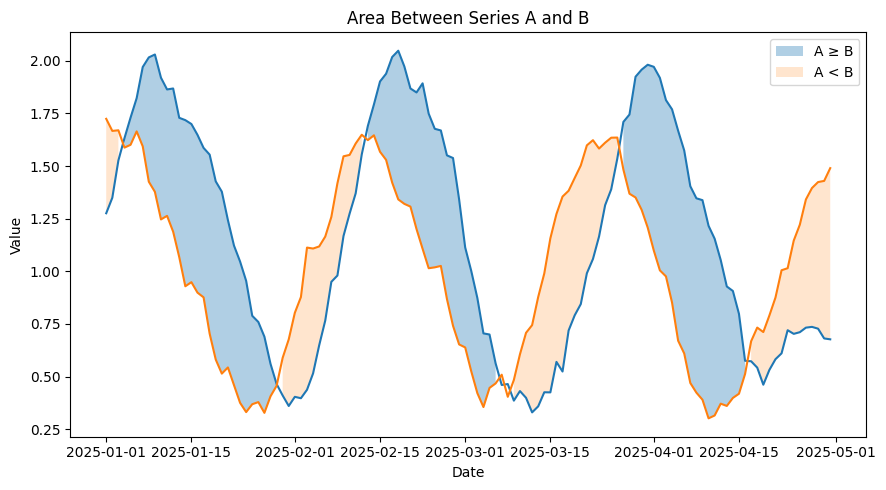

In [7]:
y1, y2 = df["A"], df["B"]
plt.figure()
plt.plot(df.index, y1, linewidth=1.5); plt.plot(df.index, y2, linewidth=1.5)
plt.fill_between(df.index, y1, y2, where=(y1>=y2), alpha=0.35, label="A ≥ B")
plt.fill_between(df.index, y1, y2, where=(y1< y2), alpha=0.20, label="A < B")
plt.title("Area Between Series A and B"); plt.xlabel("Date"); plt.ylabel("Value"); plt.legend()
plt.tight_layout(); plt.show()


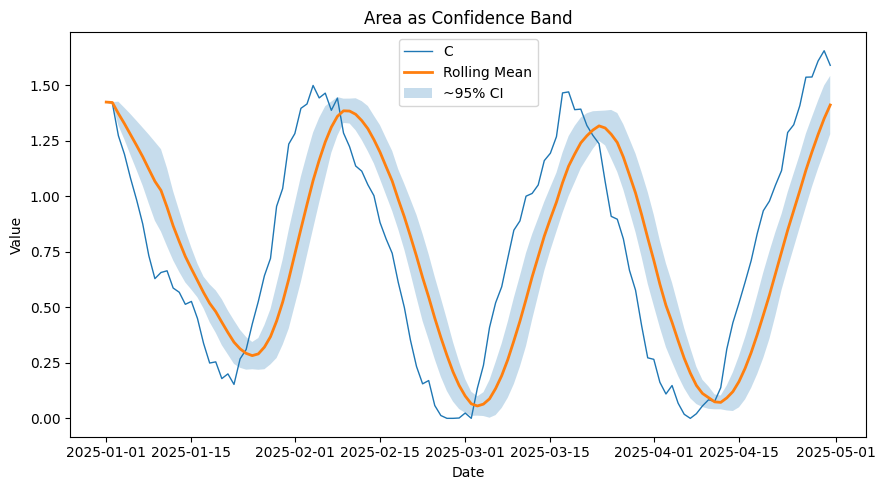

In [8]:
y = df["C"]
mu = pd.Series(y).rolling(10, min_periods=1).mean()
sd = pd.Series(y).rolling(10, min_periods=1).std().fillna(0)
lo, hi = mu-1.96*sd/np.sqrt(10), mu+1.96*sd/np.sqrt(10)

plt.figure()
plt.plot(df.index, y, linewidth=1, label="C")
plt.plot(df.index, mu, linewidth=2, label="Rolling Mean")
plt.fill_between(df.index, lo, hi, alpha=0.25, label="~95% CI")
plt.title("Area as Confidence Band"); plt.xlabel("Date"); plt.ylabel("Value"); plt.legend()
plt.tight_layout(); plt.show()


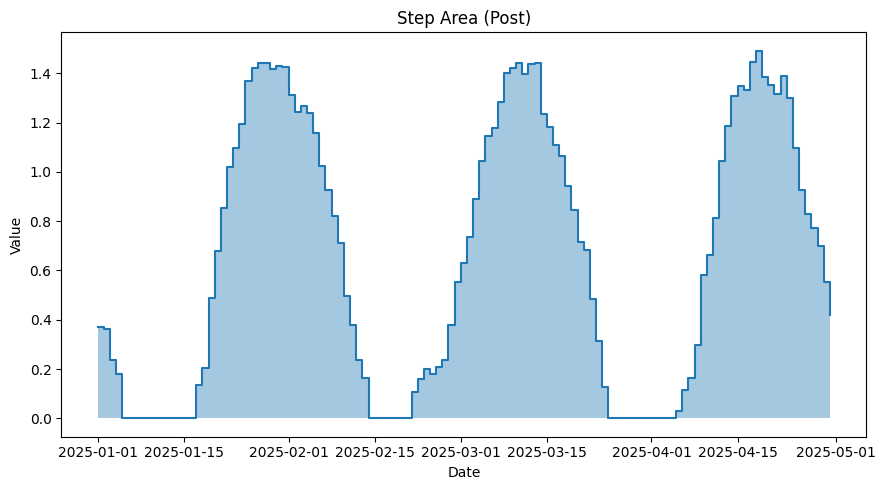

In [9]:
y = df["D"]
plt.figure()
plt.step(df.index, y, where="post")
plt.fill_between(df.index, y, step="post", alpha=0.4)
plt.title("Step Area (Post)"); plt.xlabel("Date"); plt.ylabel("Value")
plt.tight_layout(); plt.show()


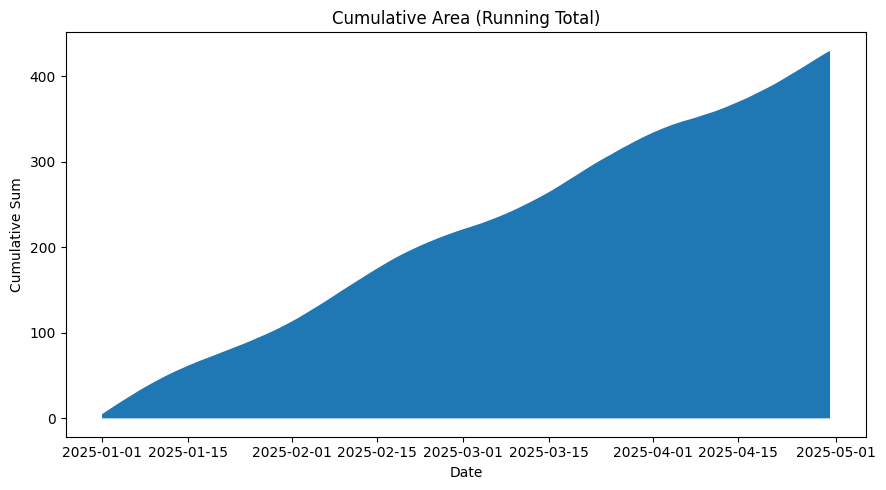

In [10]:
cum = df.sum(axis=1).cumsum()
plt.figure(); plt.fill_between(df.index, cum, 0)
plt.title("Cumulative Area (Running Total)"); plt.xlabel("Date"); plt.ylabel("Cumulative Sum")
plt.tight_layout(); plt.show()



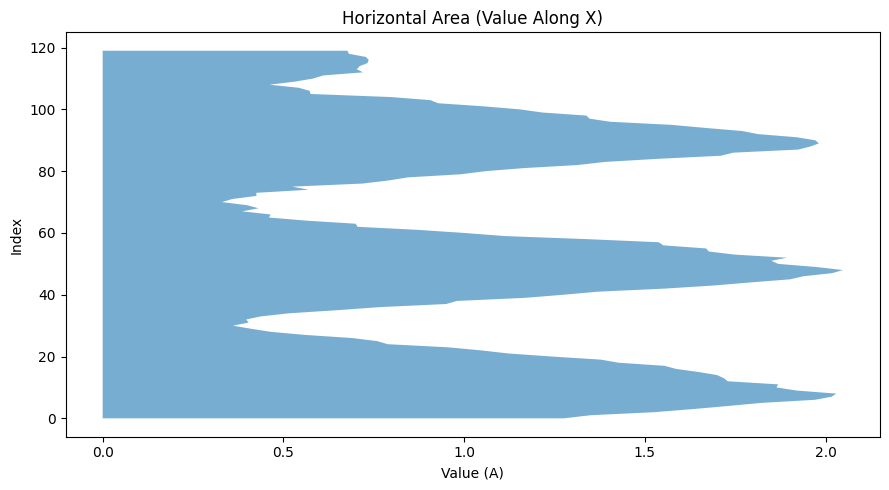

In [11]:
y = np.arange(len(df))
x = df["A"].values
plt.figure()
plt.fill_betweenx(y, 0, x, alpha=0.6)
plt.title("Horizontal Area (Value Along X)"); plt.xlabel("Value (A)"); plt.ylabel("Index")
plt.tight_layout(); plt.show()


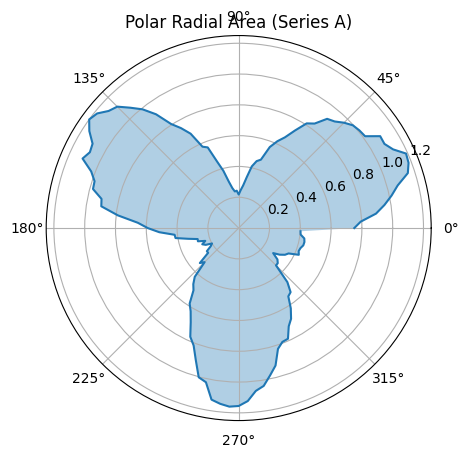

In [14]:
# Normalize A with NumPy's ptp (peak-to-peak)
a = df["A"].to_numpy()
rng = np.ptp(a)
rng = rng if rng > 0 else 1e-9  # avoid divide-by-zero

r = (a - a.min()) / rng + 0.2
theta = np.linspace(0, 2*np.pi, len(a), endpoint=False)

fig = plt.figure()
ax = fig.add_subplot(111, projection="polar")
ax.plot(theta, r, linewidth=1.5)
ax.fill(theta, r, alpha=0.35)
ax.set_title("Polar Radial Area (Series A)")
plt.show()


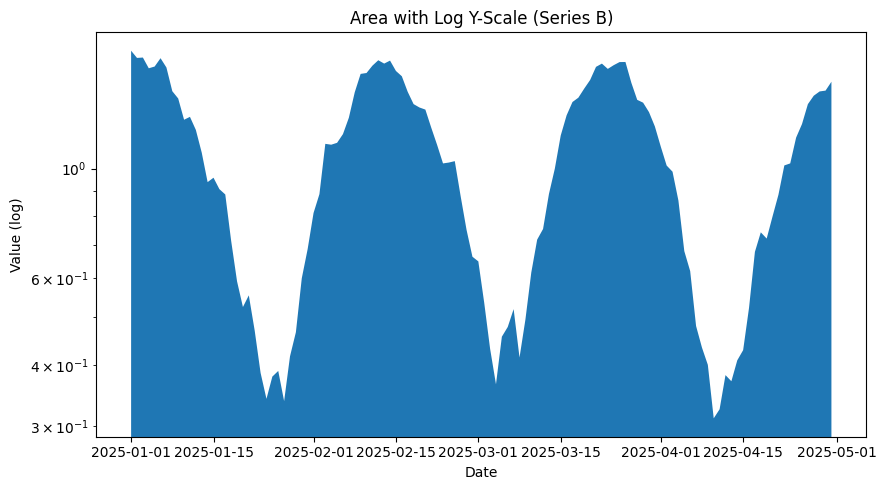

In [13]:
y = df["B"] + 0.01
plt.figure()
plt.fill_between(df.index, y, 0)
plt.yscale("log")
plt.title("Area with Log Y-Scale (Series B)"); plt.xlabel("Date"); plt.ylabel("Value (log)")
plt.tight_layout(); plt.show()
